## Analyse exploratoire des données du dataset `manager_survey_data.csv`

### **Sommaire**

1. [Importation des bibliothèques](#importation)
2. [Chargement des données](#chargement)
3. [Aperçu général](#apercu)
4. [Gestion des valeurs manquantes](#missing-check)
5. [Gestion des valeurs dupliquées](#doublons)
6. [Vérification des types de données](#types)
7. [Résumé initial du dataset](#resume)
8. [Analyse des distributions](#distributions)
9. [Détection des valeurs aberrantes](#outliers)
10. [Analyse des corrélations](#correlation)
11. [Analyse univariée](#univariee)
12. [Analyse bivariée](#bivariee)
13. [Sauvegarde du dataset nettoyé](#sauvegarde)

---

### 1. <a id='importation'>Importation des bibliothèques</a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [33]:
manager_data = pd.read_csv("../data/manager_survey_data.csv")

---

### 3. <a id='apercu'>Aperçu général</a>

In [34]:
print(f"Nombre de lignes : {manager_data.shape[0]}")
print(f"Nombre de colonnes : {manager_data.shape[1]}")

Nombre de lignes : 4410
Nombre de colonnes : 3


In [35]:
print("Informations de base :")
manager_data.info()

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [36]:
print(f"Sommaire des statistiques : \n{manager_data.describe()}")

Sommaire des statistiques : 
        EmployeeID  JobInvolvement  PerformanceRating
count  4410.000000     4410.000000        4410.000000
mean   2205.500000        2.729932           3.153741
std    1273.201673        0.711400           0.360742
min       1.000000        1.000000           3.000000
25%    1103.250000        2.000000           3.000000
50%    2205.500000        3.000000           3.000000
75%    3307.750000        3.000000           3.000000
max    4410.000000        4.000000           4.000000


In [37]:
print("Nombre de valeurs uniques par colonne :")
for column in manager_data.columns:
    print(f"- {column} : {manager_data[column].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne :
- EmployeeID : 4410 valeurs uniques
- JobInvolvement : 4 valeurs uniques
- PerformanceRating : 2 valeurs uniques


In [38]:
display(manager_data.head())

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


---

### 4. <a id='missing-check'>Gestion des valeurs manquantes</a>

In [39]:
if (manager_data.isnull().sum() > 0).any():
    missing_values = manager_data.isnull().sum()[manager_data.isnull().sum() > 0]
    missing_percentage = (missing_values / len(manager_data) * 100).round(2)
    print("Valeurs manquantes par colonne :")
    for col in missing_values.index:
        print(f"{col} : {missing_values[col]} valeurs ({missing_percentage[col]}%)")
else:
    print("Il n'y a pas de valeurs manquantes dans le dataset")

Il n'y a pas de valeurs manquantes dans le dataset


Comme il n'y a pas de valeurs manquantes, il n'est pas nécessaire de les gérer.


---

### 5. <a id='doublons'>Gestion des valeurs dupliquées</a>

In [40]:
if manager_data.duplicated().sum() > 0:
    print(f"Nombre de valeurs dupliquées : {manager_data.duplicated().sum()}")
    manager_data = manager_data.drop_duplicates()
    print(f"Nombre de lignes après suppression des doublons : {employee_data.shape[0]}")
else:
    print("Il n'y a pas de valeurs dupliquées dans le dataset")

Il n'y a pas de valeurs dupliquées dans le dataset


---

### 6. <a id='types'>Vérification des types de données</a>

In [41]:
numerical_columns = manager_data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    invalid_values = manager_data[column].apply(lambda x: isinstance(x, (str)))
    if invalid_values.any():
        print(f"La colonne {column} contient des valeurs non numériques :")
        print(manager_data[invalid_values][column])
        print(DELIMITER)

if not invalid_values.any():
    print("Aucune valeur non numérique a été trouvée dans les colonnes numériques")

Aucune valeur non numérique a été trouvée dans les colonnes numériques


In [42]:
categorical_columns = manager_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Vérification des valeurs uniques dans la colonne {column}")
    print(manager_data[column].unique())
    print(DELIMITER)

---

### 7. <a id='resume'>Résumé initial du dataset</a>

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 3

‎ 

| #  | Colonne              | Type    | Description                               | Valeurs manquantes | Moyenne | Médiane | Min | Max | Distribution attendue |
|----|----------------------|---------|-------------------------------------------|--------------------|---------|---------|-----|-----|----------------------|
| 1  | EmployeeID          | int64   | Identifiant unique pour chaque employé   | 0                  | -       | -       | -   | -   | Unique, sans répétition |
| 2  | JobInvolvement      | int64   | Implication dans le travail (1 à 4)      | 0                  | 2.73    | 3       | 1   | 4   | Répartition probable autour de 3 |
| 3  | PerformanceRating   | int64   | Évaluation de la performance (3 à 4)     | 0                  | 3.15    | 3       | 3   | 4   | Très concentré sur 3 et 4 |

‎ 

**Points notables**
- Pas de valeurs manquantes
- Pas de doublons dans le dataset, donc aucun besoin de gérer ce cas de figure
- Les scores sont tous sur une échelle de 1 à 4
- Aucun manager noté 1 ou 2

---

### 8. <a id='distributions'>Analyse des distributions</a>

#### 8.1. Sélection des colonnes pertinentes

Les colonnes suivantes seront considérées dans le cadre de cette analyse :
- `JobInvolvement`
- `PerformanceRating`

In [43]:
numerical_columns = numerical_columns.drop(['EmployeeID'])
print(f"Colonnes numériques : {numerical_columns.tolist()}")

Colonnes numériques : ['JobInvolvement', 'PerformanceRating']


---

#### 8.2. Histogrammes

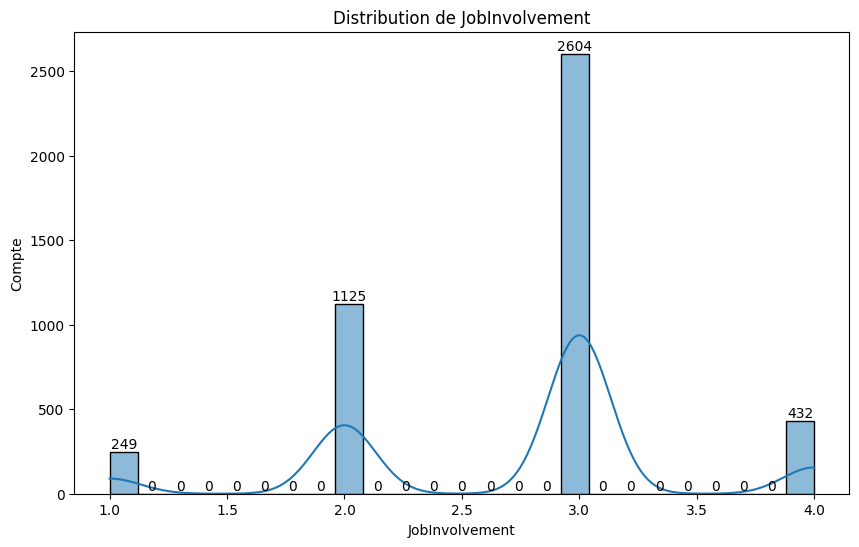

--------------------------------


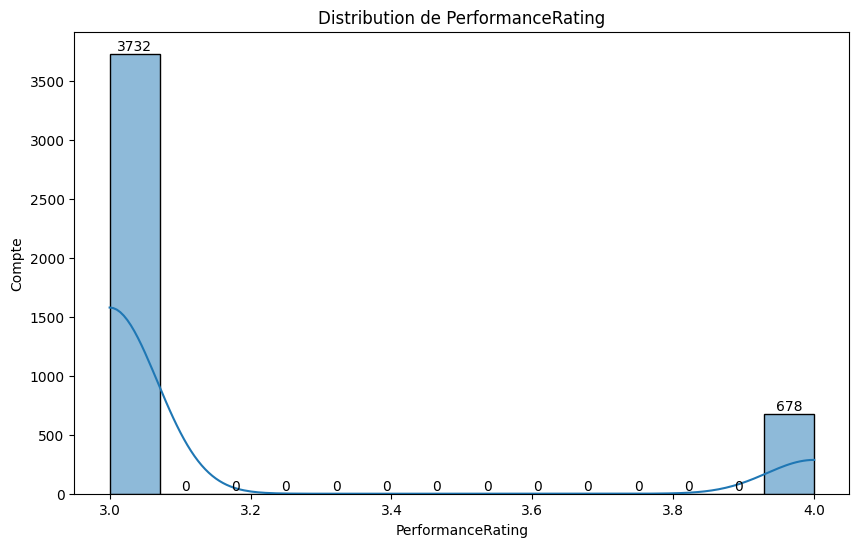

--------------------------------


In [44]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(manager_data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Compte')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Tableau récapitulatif**
| #  | Colonne              | Description                               | Distribution |
|----|----------------------|-------------------------------------------|--------------|
| 1  | JobInvolvement      | Implication dans le travail (1 à 4)      | Fort pic à 3, valeurs plus rares à 1 et 4 |
| 2  | PerformanceRating   | Évaluation de la performance (3 à 4)     |  Distribution très biaisée vers 3, peu de notes à 4 |

‎ 

**Points notables**
- `JobInvolvement` : Distribution très biaisée vers 3, peu de notes à 1 et 4
- `PerformanceRating` : Distribution très biaisée vers 3, peu de notes à 4

---

### 9. <a id='outliers'>Détection des valeurs aberrantes</a>

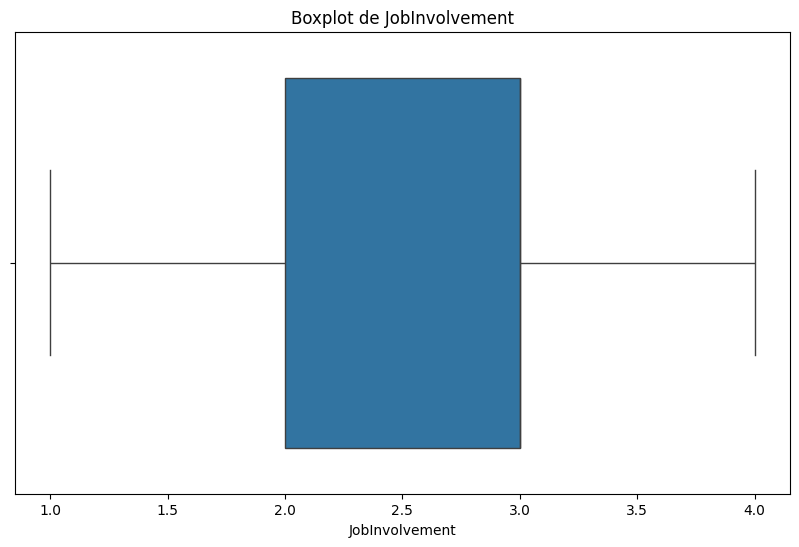

--------------------------------


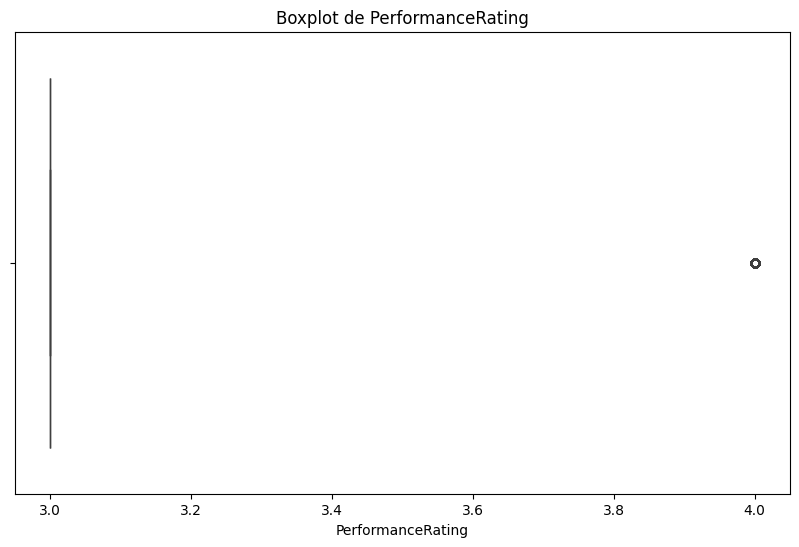

--------------------------------


In [45]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=manager_data)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

**Tableau récapitulatif**
| #  | Colonne              |  Description                               | Distribution (Boxplot) |
|----|----------------------|-------------------------------------------| ------------------------------|
| 1  | JobInvolvement      | Implication dans le travail (1 à 4)      |  Distribution équilibrée, pas d'outliers |
| 2  | PerformanceRating   |  Évaluation de la performance (3 à 4)     |  Extrêmement concentré sur 3, 4 considéré comme outlier |

‎ 

**Points notables**
- `JobInvolvement` : Distribution équilibrée, pas d'outliers
- `PerformanceRating` : Extrêmement concentré sur 3, 4 considéré comme outlier


Comme 4 n'est pas considéré comme une véritable valeur aberrante de part sa proximité avec la distribution normale des données, il n'est pas nécessaire de gérer les lignes avec une note de 4 pour la colonne `PerformanceRating`.

---

### 10. <a id='correlation'>Analyse des corrélations</a>

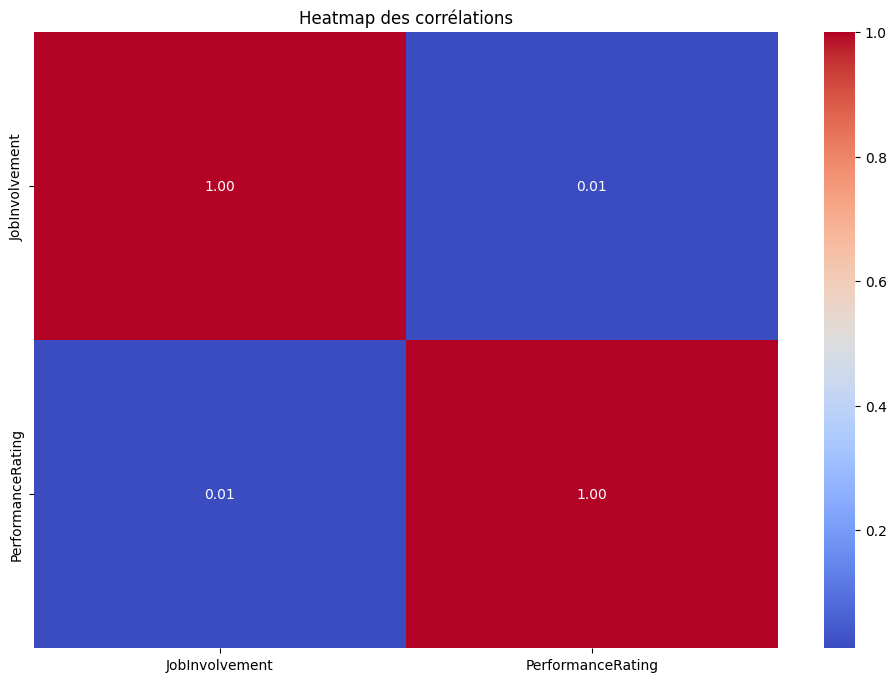

In [46]:
corr_matrix = manager_data[numerical_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap des corrélations')
plt.show()

**Tableau récapitulatif**
| #  | Colonne              | Type    | Description                               | Corrélation avec JobInvolvement | Corrélation avec PerformanceRating |
|----|----------------------|---------|-------------------------------------------|---------------------------------|-----------------------------------|
| 1  | JobInvolvement      | int64   | Implication dans le travail (1 à 4)      | 1.00                            | 0.01                              |
| 2  | PerformanceRating   | int64   | Évaluation de la performance (3 à 4)     | 0.01                            | 1.00                              |

‎ 

**Point notable**
- Aucune forte corrélation n'est observée entre les variables, ce qui suggère qu'elles évoluent indépendamment

---

### 11. <a id='univariee'>Analyse univariée</a>

Étant donné que [l'analyse des distributions](#distributions), et [l'identification des outliers](#outliers) ont déjà été faites dans des parties précédentes, il n'est pas nécessaire de les ajouter ici.

---

### 12. <a id='bivariee'>Analyse bivariée</a>

##### 12.1. Scatterplots

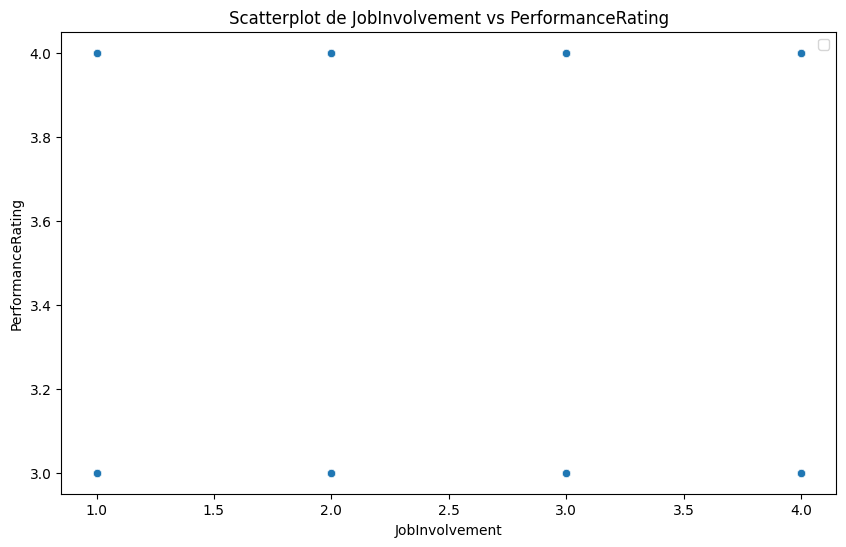

--------------------------------


In [47]:
def generate_scatterplot(data, x_var, y_var, hue_var=None):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data, x=x_var, y=y_var, hue=hue_var, palette="viridis")
    plt.title(f"Scatterplot de {x_var} vs {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title=hue_var)
    plt.show()


for i, x_var in enumerate(numerical_columns):
    for y_var in numerical_columns[i+1:]:
        generate_scatterplot(data=manager_data, x_var=x_var, y_var=y_var)
        print(DELIMITER)

**Observations**
- On observe que les points sont alignés sur deux niveaux distincts de PerformanceRating (3 et 4).
- Les points sont répartis sans tendance claire entre JobInvolvement et PerformanceRating.
- Pour chaque niveau de JobInvolvement (1 à 4), on retrouve à peu près le même ratio d’employés ayant une performance de 3 et 4.
- La note 3 domine, ce qui renforce l’idée que l’évaluation de la performance suit une distribution biaisée (tendance à donner des scores neutres).
- Les notes de 4 semblent attribuées de manière homogène à toutes les catégories de JobInvolvement, ce qui pourrait indiquer un manque de différenciation réelle entre les employés les plus impliqués et les autres.

──────────────────────────────────────────────────

##### 12.2. KDEplots

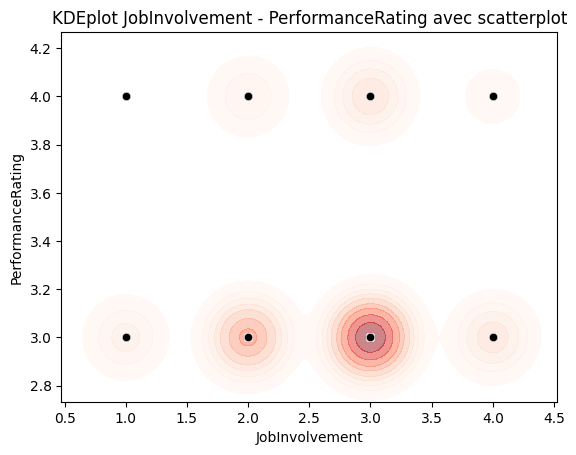

In [48]:
sns.kdeplot(x=manager_data['JobInvolvement'], y=manager_data['PerformanceRating'], fill=True, cmap="Reds", alpha=0.5)
sns.scatterplot(x=manager_data['JobInvolvement'], y=manager_data['PerformanceRating'], color="black", alpha=0.7)
plt.title(f"KDEplot JobInvolvement - PerformanceRating avec scatterplot")
plt.show()

**Observations**
- Forte densité sur (JobInvolvement=3, PerformanceRating=3)
- Deux groupes principaux bien distincts
  - Le premier groupe : La grande majorité des employés ont PerformanceRating = 3, quel que soit leur JobInvolvement.
  - Le second groupe : Quelques employés ont PerformanceRating = 4, mais ils sont répartis de manière homogène sur tous les niveaux d’implication.
- La répartition des valeurs n’indique aucune corrélation significative.
- La densité est presque identique pour tous les niveaux de JobInvolvement, ce qui signifie que les employés très impliqués ne sont pas systématiquement mieux évalués.
- L’attribution des notes de PerformanceRating = 4 ne suit aucun schéma précis en fonction de JobInvolvement, ce qui suggère que l’implication au travail n’est pas un critère déterminant pour l’évaluation de la performance.

---

### 13. <a id='sauvegarde'>Sauvegarde du dataset nettoyé</a>

In [ ]:
manager_data.to_csv('../data/cleaned_manager_survey.csv', index=False)

---